<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo91/blob/main/Reto_Entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

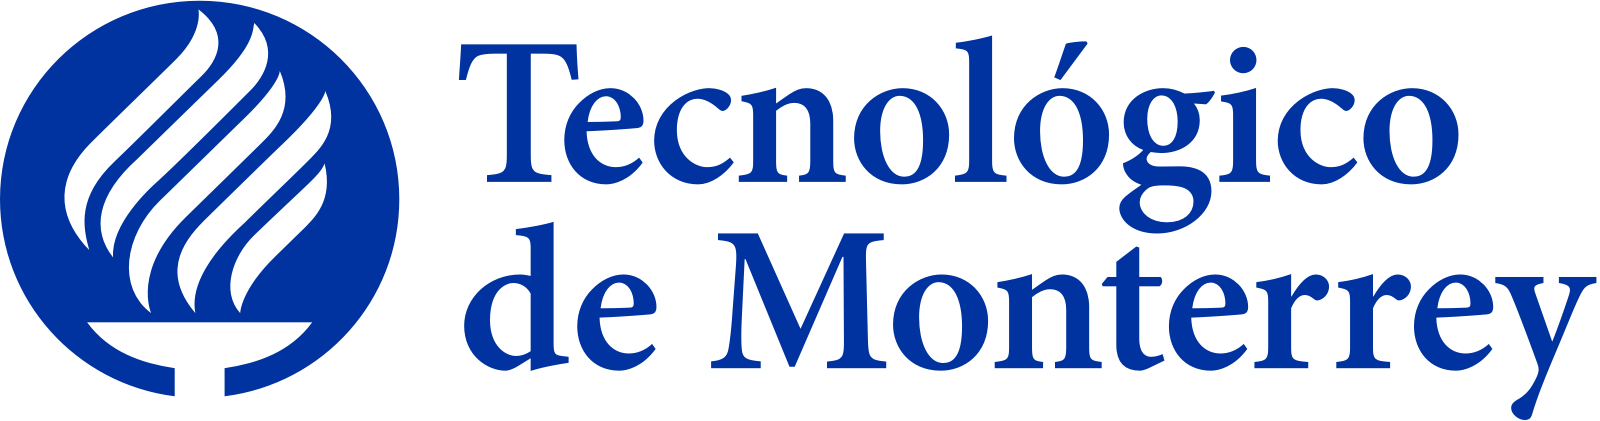


Actividad: Repaso transformación y reducción de dimensiones

Nombre: Andrea Vazquez Tadeo (A01730613 ) y Jose David Hernandez Navarro (A)

Materia: Ciencia y analitica de datos

Profesor: Maria de la Paz Rico Fernandez

Fecha: 16 de noviembre de 2022

#Introducción

#Objetivos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import requests, zipfile
from io import BytesIO

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, StandardScaler

In [2]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 6.5 MB/s 
     |████████████████████████████████| 1.0 MB 42.4 MB/s 
     |████████████████████████████████| 1.7 MB 44.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 46.6 MB/s 
     |████████████████████████████████| 6.3 MB 33.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=15ea173798901c21427911685d9ae60840406097bc924a4fcd4f1c60844e0890
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=e841cfa5dd76428ef99400189a59675626a5664db6bce0600b309ac2b32637b3
  Stored in directory: /root/.

#Limpieza, análisis, visualización y agrupamiento

In [3]:
#Importamos los datos
sub = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(sub)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')

df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [23]:
print(df["SEMAFORO"].value_counts())

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64


In [5]:
df_subte = df.copy()
df_subte.describe().T

,count,mean,std,min,25%,50%,75%,max
LONGITUD,1068.0,-101.891007,6.703263,-116.66425,-105.388865,-102.17418,-98.974716,-86.864120
LATITUD,1068.0,23.163618,3.887670,14.56115,20.212055,22.61719,25.510285,32.677713
PERIODO,1068.0,2020.000000,0.000000,2020.00000,2020.000000,2020.00000,2020.000000,2020.000000
ALC_mg/L,1064.0,235.633759,116.874291,26.64000,164.000000,215.52750,292.710000,1650.000000
CONDUCT_mS/cm,1062.0,1138.953013,1245.563674,50.40000,501.750000,815.00000,1322.750000,18577.000000
SDT_mg/L,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_subte.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [7]:
df_subte.shape

(1068, 57)

In [8]:
df_subte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [9]:
df_subte = pd.DataFrame(df_subte)
df_subte['SEMAFORO'] = df_subte['SEMAFORO'].astype('category')
df_subte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CLAVE                 1068 non-null   object  
 1   SITIO                 1068 non-null   object  
 2   ORGANISMO_DE_CUENCA   1068 non-null   object  
 3   ESTADO                1068 non-null   object  
 4   MUNICIPIO             1068 non-null   object  
 5   ACUIFERO              1068 non-null   object  
 6   SUBTIPO               1068 non-null   object  
 7   LONGITUD              1068 non-null   float64 
 8   LATITUD               1068 non-null   float64 
 9   PERIODO               1068 non-null   int64   
 10  ALC_mg/L              1064 non-null   float64 
 11  CALIDAD_ALC           1064 non-null   object  
 12  CONDUCT_mS/cm         1062 non-null   float64 
 13  CALIDAD_CONDUC        1062 non-null   object  
 14  SDT_mg/L              0 non-null      float64 
 15  SDT_

In [10]:
df_subte.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [11]:
df_sub = df_subte.copy()

df_sub = df.drop(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',	'ACUIFERO',	'SUBTIPO',	'CALIDAD_ALC', 'CALIDAD_CONDUC',	'SDT_mg/L',	'CALIDAD_SDT_ra',	'CALIDAD_SDT_salin',	'CALIDAD_FLUO',	'CALIDAD_DUR',	'CALIDAD_COLI_FEC',	'CALIDAD_N_NO3',	'CALIDAD_AS',	'CALIDAD_CD',	'CALIDAD_CR',
                  'CALIDAD_HG',	'CALIDAD_PB',	'CALIDAD_MN',	'CALIDAD_FE',	'CONTAMINANTES',	'CUMPLE_CON_ALC',	'CUMPLE_CON_COND',	'CUMPLE_CON_SDT_ra',	'CUMPLE_CON_SDT_salin',	'CUMPLE_CON_FLUO',	'CUMPLE_CON_DUR',	'CUMPLE_CON_CF',	'CUMPLE_CON_NO3',	'CUMPLE_CON_AS',
                  'CUMPLE_CON_CD',	'CUMPLE_CON_CR',	'CUMPLE_CON_HG',	'CUMPLE_CON_PB',	'CUMPLE_CON_MN',	'CUMPLE_CON_FE'], axis = 1) 
df_sub

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,2020,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,2020,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,2020,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,2020,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,2020,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,2020,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,-99.70099,24.78280,2020,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,-99.82249,25.55197,2020,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,-100.32683,24.80118,2020,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,Verde


In [12]:
df_sub.columns

Index(['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CONDUCT_mS/cm',
       'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
       'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO'],
      dtype='object')

In [13]:
df_sub.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


LONGITUD               -86.86412
LATITUD                32.677713
PERIODO                     2020
ALC_mg/L                  1650.0
CONDUCT_mS/cm            18577.0
FLUORUROS_mg/L              <0.2
COLI_FEC_NMP/100_mL         <1.1
AS_TOT_mg/L                <0.01
CD_TOT_mg/L               <0.003
CR_TOT_mg/L               <0.005
HG_TOT_mg/L              <0.0005
PB_TOT_mg/L               <0.005
MN_TOT_mg/L              <0.0015
FE_TOT_mg/L               <0.025
SEMAFORO                   Verde
dtype: object

In [24]:
variables_numericas = ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']

##Limpieza

In [15]:
#Revisamos los datos nulos
df_sub

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,2020,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,-102.20075,21.99958,2020,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,-102.28801,22.36685,2020,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,-102.29449,22.18435,2020,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,-110.24480,23.45138,2020,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,2020,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,-99.70099,24.78280,2020,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,-99.82249,25.55197,2020,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,-100.32683,24.80118,2020,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,Verde


In [16]:
enc_sem = OrdinalEncoder()
df_sub[['SEMAFORO']] = enc_sem.fit_transform(df_sub[['SEMAFORO']])
df_sub

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,-102.02210,22.20887,2020,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,2.0
1,-102.20075,21.99958,2020,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,2.0
2,-102.28801,22.36685,2020,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,1.0
3,-102.29449,22.18435,2020,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,2.0
4,-110.24480,23.45138,2020,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,-99.54191,24.76036,2020,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,1.0
1064,-99.70099,24.78280,2020,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,1.0
1065,-99.82249,25.55197,2020,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,1.0
1066,-100.32683,24.80118,2020,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,2.0


In [25]:
for x in variables_numericas:
  print(" nombre de la columna -------------------------" + x)

 nombre de la columna -------------------------LONGITUD
 nombre de la columna -------------------------LATITUD
 nombre de la columna -------------------------PERIODO
 nombre de la columna -------------------------ALC_mg/L
 nombre de la columna -------------------------CONDUCT_mS/cm
 nombre de la columna -------------------------SDT_M_mg/L
 nombre de la columna -------------------------FLUORUROS_mg/L
 nombre de la columna -------------------------DUR_mg/L
 nombre de la columna -------------------------COLI_FEC_NMP/100_mL
 nombre de la columna -------------------------N_NO3_mg/L
 nombre de la columna -------------------------AS_TOT_mg/L
 nombre de la columna -------------------------CD_TOT_mg/L
 nombre de la columna -------------------------CR_TOT_mg/L
 nombre de la columna -------------------------HG_TOT_mg/L
 nombre de la columna -------------------------PB_TOT_mg/L
 nombre de la columna -------------------------MN_TOT_mg/L
 nombre de la columna -------------------------FE_TOT_mg/L
 no

In [20]:
#Revisamos cada columna del dataframe
print(df_sub['FLUORUROS_mg/L'].unique())
print(df_sub['FLUORUROS_mg/L'].value_counts())

['0.9766' '0.9298' '1.8045' '1.1229' '0.2343' '0.2756' '0.289' '0.5607'
 '0.3421' '0.5088' '0.4925' '0.6351' '0.2636' '0.4125' '0.3513' '0.4116'
 '0.6076' '0.4142' '0.5234' '0.2563' '0.8969' '0.3557' '0.3542' '0.2572'
 '0.3102' '0.3062' '0.3823' '0.7995' '0.2943' '0.272' '0.3593' '0.3116'
 '0.7633' '0.2671' '0.2072' '<0.2' '0.3848' '0.2781' '0.226' '0.3068'
 '0.2229' '0.8119' '0.7515' '0.4462' '0.3728' '0.2664' '2.2275' '0.9497'
 '0.2482' '0.2655' '0.3207' '0.3284' '0.6042' '0.9832' '0.2462' '0.6138'
 '1.658' '1.4981' '1.7838' '0.4265' '0.5588' '0.828' '0.489' '0.2469'
 '0.9052' '2.0459' '0.4386' '0.2079' '0.8061' '1.716' '0.8564' '1.4876'
 '0.3963' '1.8247' '0.4605' '2.6173' '2.5556' '1.9905' '0.7554' '0.5695'
 '1.2825' '6.6215' '1.4009' '0.3269' '5.0148' '1.5169' '1.7789' '3.2139'
 '0.4113' '0.6039' '4.276' '12.501' '1.4156' '4.2962' '1.4242' '1.4171'
 '1.3668' '2.42' '3.0621' '0.5081' '0.7144' '0.8732' '1.0391' '1.7093'
 '1.8523' '4.855' '0.7535' '0.4503' '0.3951' '2.7784' '1.3811' 

In [21]:
def know_min_max(columns,dType):
  for column in columns:
    print(f'{dType} - {column}: max {df[column].max()}, min: {df[column].min()}')
  
  plt.hist(df[columns])
  plt.show()

In [29]:
print("sumatoria por valores unicos--------------------") 
print(df_sub[x].value_counts())

sumatoria por valores unicos--------------------
2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int64


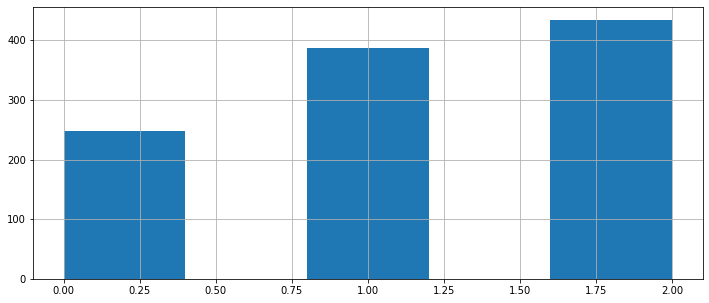

In [30]:
y = df_sub['SEMAFORO']
y
y.hist(bins = 5, figsize=(12, 5))

In [32]:
for name in variables_numericas:

  df_sub[name] = df_sub[name].astype('str') 
  df_sub[name] = df_sub[name].str.replace('<25','25') 
  df_sub[name] = df_sub[name].str.replace('<0.2','0.2') 
  df_sub[name] = df_sub[name].str.replace('<20','20') 
  df_sub[name] = df_sub[name].str.replace('<1.1','1.1')
  df_sub[name] = df_sub[name].str.replace('<0.02','0.02') 
  df_sub[name] = df_sub[name].str.replace('<0.01','0.01') 
  df_sub[name] = df_sub[name].str.replace('<0.003','0.003')
  df_sub[name] = df_sub[name].str.replace('<0.005','0.004') 
  df_sub[name] = df_sub[name].str.replace('<0.0005','0.0004') 
  df_sub[name] = df_sub[name].str.replace('<0.0015','0.0015') 
  df_sub[name] = df_sub[name].str.replace('<0.025','0.025')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of reg

In [33]:
datos_sc = preprocessing.StandardScaler().fit_transform(df_sub)
datos_sc

array([[-0.01956574, -0.24569861,  0.        , ..., -0.1886027 ,
        -0.05804251,  1.05880628],
       [-0.04622943, -0.29955813,  0.        , ..., -0.1886027 ,
        -0.06962256,  1.05880628],
       [-0.05925307, -0.20504341,  0.        , ..., -0.1886027 ,
        -0.06962256, -0.22474095],
       ...,
       [ 0.3087282 ,  0.61462801,  0.        , ..., -0.12828428,
        -0.03567729, -0.22474095],
       [ 0.23345496,  0.42141673,  0.        , ..., -0.16070211,
        -0.04187379,  1.05880628],
       [ 0.17283071,  0.49672073,  0.        , ..., -0.1886027 ,
        -0.06962256,  1.05880628]])

In [34]:
datos_minmax = preprocessing.MinMaxScaler().fit_transform(df_sub)
datos_minmax

array([[4.91345172e-01, 4.22139674e-01, 0.00000000e+00, ...,
        0.00000000e+00, 3.58922672e-04, 1.00000000e+00],
       [4.85350232e-01, 4.10587262e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.82422057e-01, 4.30859871e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.00000000e-01],
       ...,
       [5.65157266e-01, 6.06672469e-01, 0.00000000e+00, ...,
        2.52769890e-03, 1.05213058e-03, 5.00000000e-01],
       [5.48233179e-01, 5.65230281e-01, 0.00000000e+00, ...,
        1.16919993e-03, 8.60070553e-04, 1.00000000e+00],
       [5.34602701e-01, 5.81382352e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [35]:
median_v = df_sub['CONDUCT_mS/cm'].median() 
df_sub['CONDUCT_mS/cm']= df_sub['CONDUCT_mS/cm'].replace(np.nan, np.median)

df_sub.isnull().any().sort_values(ascending=False)

LONGITUD               False
LATITUD                False
FE_TOT_mg/L            False
MN_TOT_mg/L            False
PB_TOT_mg/L            False
HG_TOT_mg/L            False
CR_TOT_mg/L            False
CD_TOT_mg/L            False
AS_TOT_mg/L            False
N_NO3_mg/L             False
COLI_FEC_NMP/100_mL    False
DUR_mg/L               False
FLUORUROS_mg/L         False
SDT_M_mg/L             False
CONDUCT_mS/cm          False
ALC_mg/L               False
PERIODO                False
SEMAFORO               False
dtype: bool

In [36]:
for name in variables_numericas:

  df_sub['CONDUCT_mS/cm'] = df_sub['CONDUCT_mS/cm'].str.replace('nan','0') 

In [38]:
for x in variables_numericas:
  print(" nombre de la columna -------------------------" + i)
  
  #print("Valores unicos", df[i].unique())
  print(" sumatoria por valores uncos--------------------") 
  print(df_sub[i].value_counts())

 nombre de la columna -------------------------SEMAFORO
 sumatoria por valores uncos--------------------
2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int64
 nombre de la columna -------------------------SEMAFORO
 sumatoria por valores uncos--------------------
2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int64
 nombre de la columna -------------------------SEMAFORO
 sumatoria por valores uncos--------------------
2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int64
 nombre de la columna -------------------------SEMAFORO
 sumatoria por valores uncos--------------------
2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int64
 nombre de la columna -------------------------SEMAFORO
 sumatoria por valores uncos--------------------
2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int64
 nombre de la columna -------------------------SEMAFORO
 sumatoria por valores uncos--------------------
2.0    434
1.0    387
0.0    247
Name: SEMAFORO, dtype: int6

##Análisis

A través de las funciones describe(), mean() se debe identificar tendencias centrales promedio, media y mediana de los datos. Así como medidas de dispersión, máximo, mínimo.

In [39]:
df_sub.describe().T

,count,unique,top,freq
LONGITUD,1068,1066,-98.350389,2
LATITUD,1068,1067,19.234778,2
PERIODO,1068,1,2020,1068
ALC_mg/L,1068,817,157.62,5
CONDUCT_mS/cm,1068,802,0,6
SDT_M_mg/L,1068,926,320,4
FLUORUROS_mg/L,1068,862,0.2,162
DUR_mg/L,1068,890,20,26
COLI_FEC_NMP/100_mL,1068,125,1.1,737
N_NO3_mg/L,1068,996,0.02,65


##Visualización

In [40]:
df_sub.corr

<bound method DataFrame.corr of         LONGITUD   LATITUD PERIODO ALC_mg/L CONDUCT_mS/cm SDT_M_mg/L  \
0      -102.0221  22.20887    2020   229.99         940.0      603.6   
1     -102.20075  21.99958    2020   231.99         608.0      445.4   
2     -102.28801  22.36685    2020   204.92         532.0        342   
3     -102.29449  22.18435    2020    327.0         686.0      478.6   
4      -110.2448  23.45138    2020  309.885        1841.0       1179   
...          ...       ...     ...      ...           ...        ...   
1063   -99.54191  24.76036    2020  231.045        2350.0     1545.8   
1064   -99.70099   24.7828    2020    256.0         529.0        297   
1065   -99.82249  25.55197    2020   330.69        2600.0       1873   
1066  -100.32683  24.80118    2020   193.14         873.0   690.6667   
1067  -100.73302   25.0938    2020   263.07         817.0        495   

     FLUORUROS_mg/L  DUR_mg/L COLI_FEC_NMP/100_mL N_NO3_mg/L AS_TOT_mg/L  \
0            0.9766   213.7

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


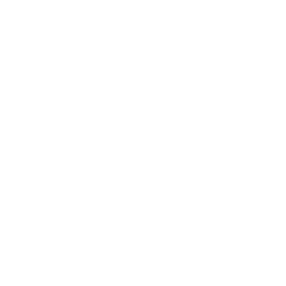

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

tu_correlacion = df_sub.corr()

sns.heatmap(
    tu_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

##Identificar correlaciones

##Agrupamiento

#Analisis


Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de **K- means.**

#Resultados


Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.